### Import thư viện & Cấu hình

In [128]:
import sys
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

sys.path.append('..')

from models.Decision_Tree import DecisionTreeClassifier, export_model, load_model

INPUT_FILE = '../../data/IRIS.csv'
MODEL_FILE = '../models/decision_tree_model.pkl'

print("Imports OK")


Imports OK


### Load & Split Data

In [129]:
def load_and_split_data(filename, train_ratio=0.8):
    df = pd.read_csv(filename)
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)

    split = int(len(df) * train_ratio)
    df_train = df.iloc[:split]
    df_test = df.iloc[split:]

    X_train = df_train.iloc[:, :4].values
    y_train = df_train.iloc[:, -1].values

    X_test = df_test.iloc[:, :4].values
    y_test = df_test.iloc[:, -1].values

    print(f"Train: {len(X_train)} | Test: {len(X_test)}")
    return X_train, y_train, X_test, y_test


In [130]:
X_train, y_train, X_test, y_test = load_and_split_data(INPUT_FILE)


Train: 120 | Test: 30


In [131]:
import os
print(os.getcwd())


c:\Project\MachineLearning\ML_Team4_IrisFlowers\src\notebooks


### Train Decision Tree

In [132]:
model = DecisionTreeClassifier(
    max_depth=4,
    criterion="entropy"
)

model.fit(X_train, y_train)
print("Train xong Decision Tree")


Train xong Decision Tree


### Predict & Accuracy

In [133]:
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test) * 100

print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 93.33%


### Export Model

In [134]:
export_model(model, MODEL_FILE)


[OK] Đã xuất Decision Tree model tại: ../models/decision_tree_model.pkl


### Đánh giá hiệu suất

In [135]:
if model:
    # 1. Dự đoán (Decision Tree trả về label)
    y_pred_labels = model.predict(X_test)

    # 2. Accuracy
    accuracy = np.mean(y_pred_labels == y_test) * 100

    # 3. Tạo DataFrame báo cáo
    results = pd.DataFrame({
        'Sepal Length': X_test[:, 0],
        'Sepal Width': X_test[:, 1],
        'Petal Length': X_test[:, 2],
        'Petal Width': X_test[:, 3],
        'Thực tế': y_test,
        'Dự đoán': y_pred_labels
    })

    # 4. Đánh dấu đúng / sai
    results['Kết quả'] = np.where(
        results['Thực tế'] == results['Dự đoán'],
        'ĐÚNG',
        'SAI'
    )

    print("=== BÁO CÁO HIỆU SUẤT ===")
    print(f"Độ chính xác trên tập Test: {accuracy:.2f}%")

    print("\nChi tiết 10 mẫu đầu tiên:")
    print(results.head(10))

    # 5. Thống kê số mẫu sai
    wrong_cases = results[results['Kết quả'] == 'SAI']
    print(f"\nTổng số mẫu dự đoán sai: {len(wrong_cases)}")


=== BÁO CÁO HIỆU SUẤT ===
Độ chính xác trên tập Test: 93.33%

Chi tiết 10 mẫu đầu tiên:
   Sepal Length  Sepal Width  Petal Length  Petal Width          Thực tế  \
0           6.1          3.0           4.6          1.4  Iris-versicolor   
1           4.5          2.3           1.3          0.3      Iris-setosa   
2           6.6          2.9           4.6          1.3  Iris-versicolor   
3           5.5          2.6           4.4          1.2  Iris-versicolor   
4           5.3          3.7           1.5          0.2      Iris-setosa   
5           5.6          3.0           4.1          1.3  Iris-versicolor   
6           7.3          2.9           6.3          1.8   Iris-virginica   
7           6.7          3.3           5.7          2.1   Iris-virginica   
8           5.1          3.7           1.5          0.4      Iris-setosa   
9           4.9          2.4           3.3          1.0  Iris-versicolor   

           Dự đoán Kết quả  
0  Iris-versicolor    ĐÚNG  
1      Iris-setos

### Ma trận Tương quan (Correlation Matrix)

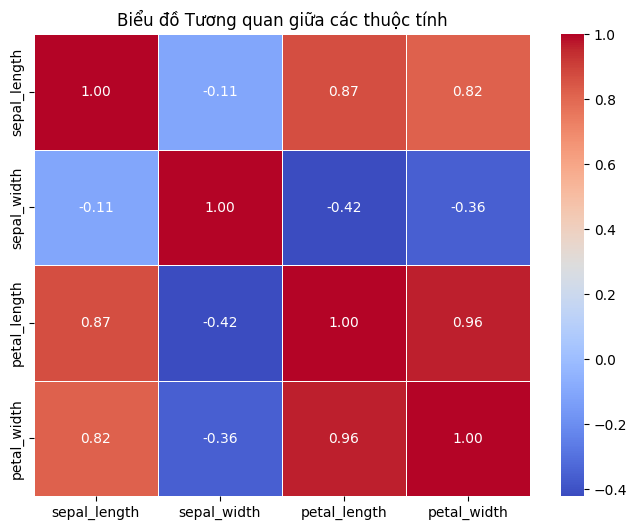

In [136]:
df_full = pd.read_csv(INPUT_FILE)
df_features = df_full.iloc[:, :4]

corr_matrix = df_features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title('Biểu đồ Tương quan giữa các thuộc tính')
plt.show()


### Confusion Matrix

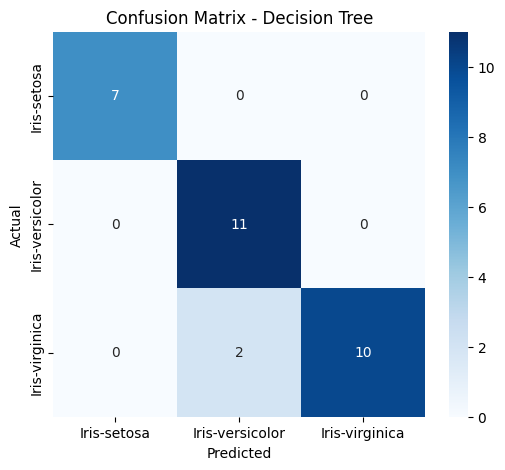

In [137]:
CLASS_ORDER = sorted(np.unique(y_test))

cm = confusion_matrix(y_test, y_pred, labels=CLASS_ORDER)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=CLASS_ORDER,
    yticklabels=CLASS_ORDER
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


### Trực quan hóa lỗi sai (Scatter Plot)

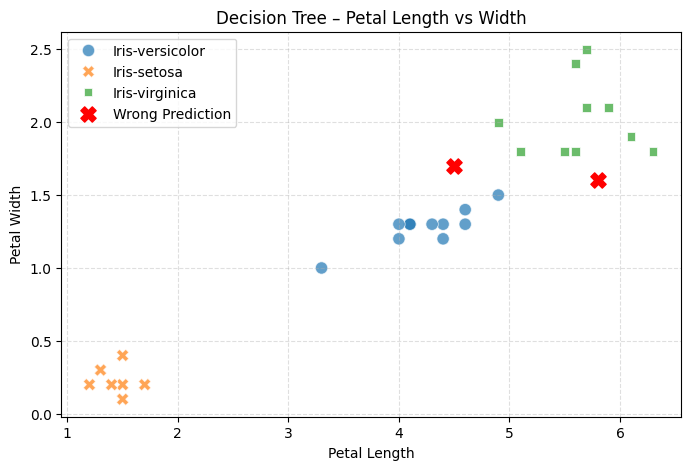

In [138]:
df_result = pd.DataFrame({
    "Petal Length": X_test[:, 2],
    "Petal Width": X_test[:, 3],
    "Actual": y_test,
    "Predicted": y_pred
})

correct = df_result[df_result["Actual"] == df_result["Predicted"]]
wrong = df_result[df_result["Actual"] != df_result["Predicted"]]

plt.figure(figsize=(8,5))

sns.scatterplot(
    data=correct,
    x="Petal Length",
    y="Petal Width",
    hue="Actual",
    style="Actual",
    s=80,
    alpha=0.7
)

if not wrong.empty:
    plt.scatter(
        wrong["Petal Length"],
        wrong["Petal Width"],
        color="red",
        marker="X",
        s=120,
        label="Wrong Prediction"
    )

plt.title("Decision Tree – Petal Length vs Width")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()
